# Linear Regression Models

The below shows linear regression models for house prices vs EGM and offence rates for multiple years

In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

Individual Model - House Price vs EGM -  2016


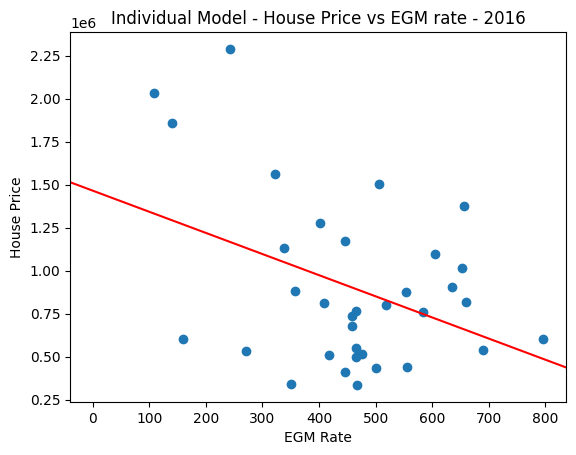

Individual Model - House Price vs EGM -  2017


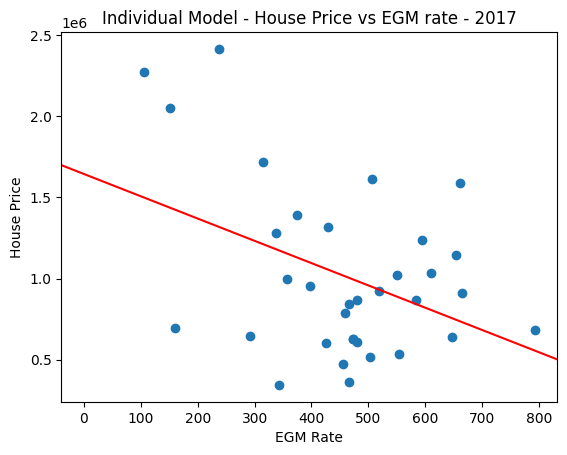

Individual Model - House Price vs EGM -  2018


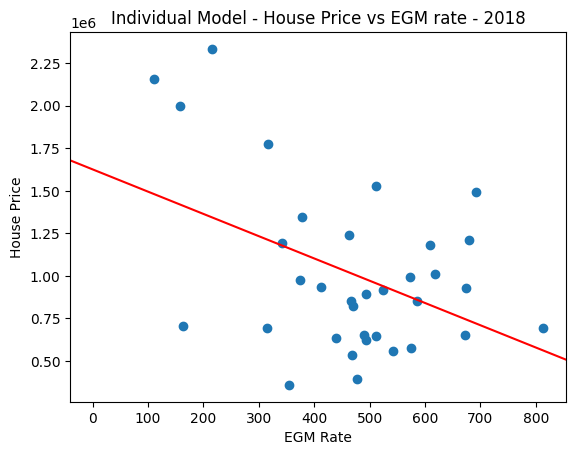

Individual Model - House Price vs EGM -  2019


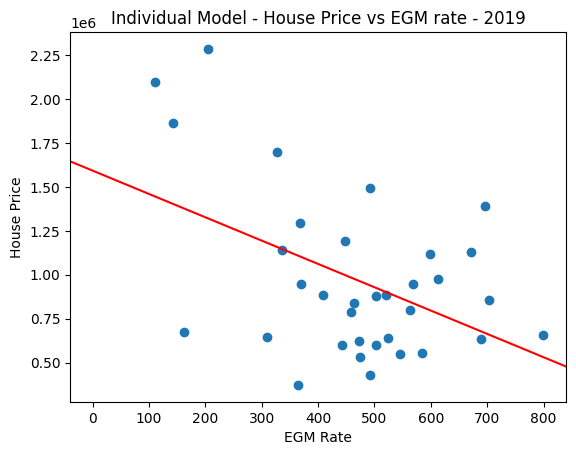

Individual Model - House Price vs EGM -  2020


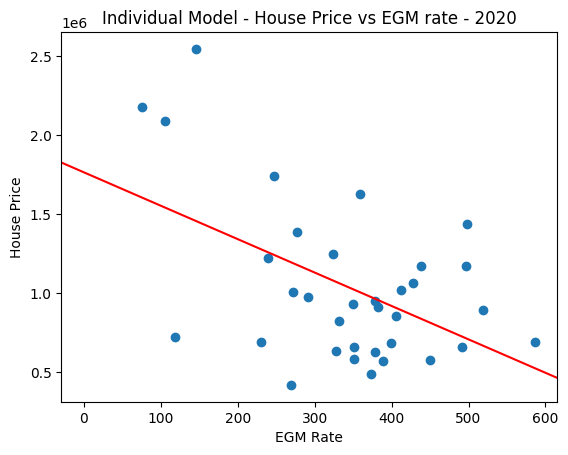

Individual Model - House Price vs Offences -  2016


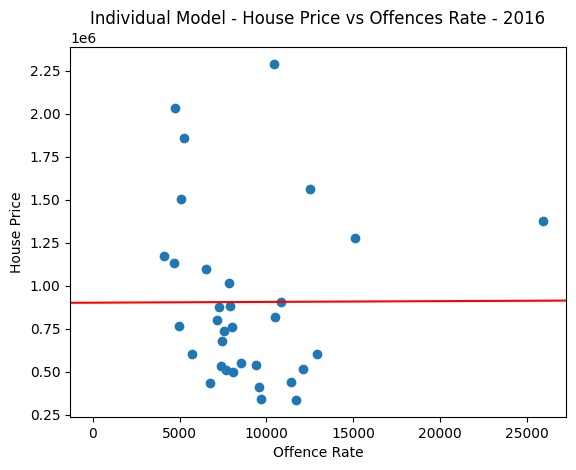

Individual Model - House Price vs Offences -  2017


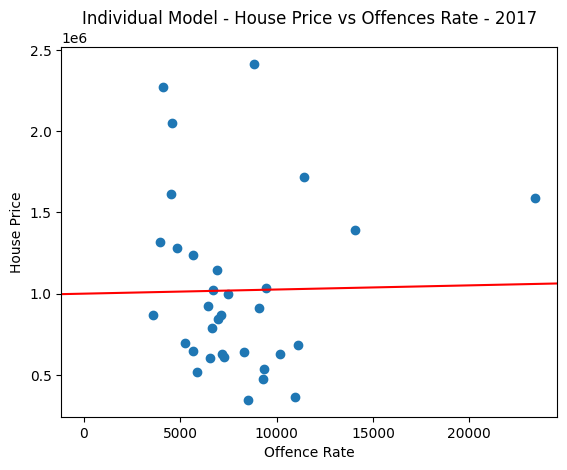

Individual Model - House Price vs Offences -  2018


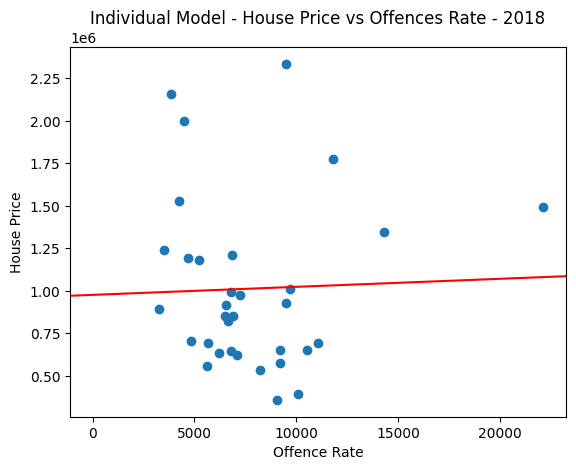

Individual Model - House Price vs Offences -  2019


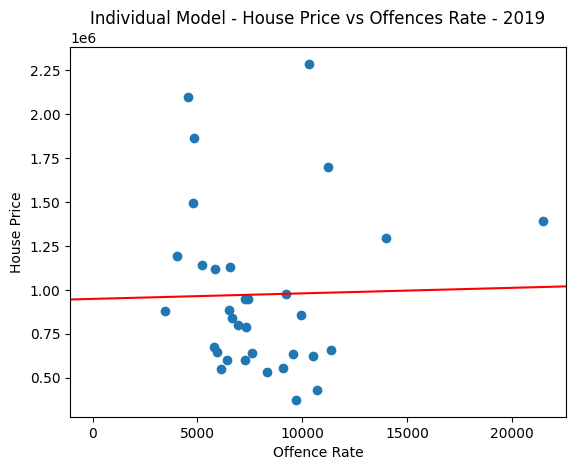

Individual Model - House Price vs Offences -  2020


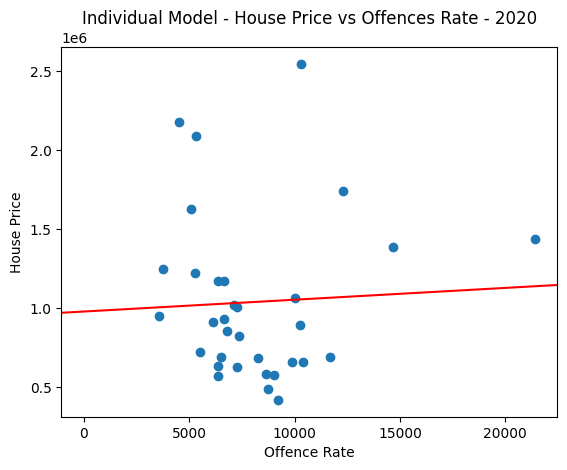

Individual Model - House Price vs EGM
   Year    Intercept  Coefficient               MSE        RMSE  Pearson Correlation
0  2016 1465002.4399   -1229.5951 196431232283.8186 443205.6321               0.3990
1  2017 1644587.9942   -1374.5316 222602450388.8782 471807.6413               0.4096
2  2018 1626196.5955   -1309.0945 188656948831.8516 434346.5769               0.4338
3  2019 1593236.3632   -1329.1603 167101671715.9863 408780.7135               0.4650
4  2020 1764659.1271   -2116.5355 186627789176.3371 432004.3856               0.5015
Individual Model - House Price vs Offences
   Year   Intercept  Coefficient               MSE        RMSE  Pearson Correlation
0  2016 900374.7505       0.4475 240459272303.2227 490366.4674               0.0037
1  2017 999089.0215       2.5567 275372907046.8569 524759.8566               0.0177
2  2018 976502.0641       4.7228 238952051573.1421 488827.2206               0.0347
3  2019 947774.8981       3.1560 219322421825.2444 468318.7182           

In [3]:
#### HOUSE PRICE VS EGM - ANY YEAR and HOUSE PRICE VS OFFENCES - ANY YEAR ####

def house_price_vs_egm(year=2019): 
    house_price_df = pd.read_csv('Houses by LGA.csv')
    egm_rate_df = pd.read_csv('EGM-New-Format.csv')

    # year = 2019
    house_price_df = house_price_df[house_price_df['Year'] == year]
    egm_rate_df = egm_rate_df[egm_rate_df['Year'] == year]

    house_price_df['LGA'] = house_price_df['LGA'].str.lower()
    # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (c)")
    # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (s)")
    house_price_df = house_price_df.rename({'Weighted House Price': 'House Price'}, axis=1)
    egm_rate_df['LGA'] = egm_rate_df['LGA'].str.lower()
    # egm_rate_df = egm_rate_df.rename({'LGA Name': 'LGA'}, axis=1)
    egm_rate_df = egm_rate_df.rename({'rate': 'EGM Rate'}, axis=1)
    # egm_rate_df

    # merge the two datasets
    # merged_HP_EGM_df = pd.merge(house_price_2019_df, egm_rate_2019_df, on='LGA')
    merged_HP_EGM_df = pd.merge(house_price_df, egm_rate_df, on='LGA')
    # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_x', axis=1)
    # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_y', axis=1)
    # merged_HP_EGM_df
    # test = pd.read_csv('supervised_test.csv')

    # x_col = ['EGM rate 2019', 'Offences Rate 2019']
    x_col = 'EGM Rate'
    y_col = 'House Price'

    # Convert columns to numpy arrays and reshape x_train
    x_train = merged_HP_EGM_df[x_col]
    y_train = merged_HP_EGM_df[y_col]
    x_train_mr = merged_HP_EGM_df[x_col].values.reshape(-1, 1)
    y_train_mr = merged_HP_EGM_df[y_col].values

    # create design matrix X and predictions y
    # # split into train and test 
    # x_train = merged_HP_EGM_df[x_col]
    # y_train = merged_HP_EGM_df[y_col]
    # x_test = test[x_col]
    # y_test = test[y_col]

    # x_train.head()

    # Fit the model
    lm_egm = LinearRegression().fit(x_train_mr, y_train_mr)
    y_pred_egm = lm_egm.predict(x_train_mr)
    # merged_HP_EGM_df['Predicted House Price 2019'] = y_pred_mr
    mse = mean_squared_error(y_train_mr, y_pred_egm)
    rmse = np.sqrt(mse)
    pearson_corr, p = pearsonr(y_train_mr, y_pred_egm)
    print("Individual Model - House Price vs EGM - ", year)
    # print('Intercept', lm_egm.intercept_)
    # print('Coefficients', lm_egm.coef_)
    # print('Mean Squared Error', '%.4f' % mse)
    # print('Root Mean Squared Error', '%.4f' % rmse)
    # print('Pearson Correlation', '%.4f' % pearson_corr)
    results = {
    'Year': year,
    'Intercept': lm_egm.intercept_,
    'Coefficient': lm_egm.coef_[0],
    'MSE': mse,
    'RMSE': rmse,
    'Pearson Correlation': pearson_corr
    }

    # Plot the scatter plot and the line of regression
    # plt.scatter(x_train_mr, y_train_mr)
    plt.scatter(merged_HP_EGM_df[x_col], merged_HP_EGM_df[y_col])
    # plt.plot(merged_HP_EGM_df[x_col], merged_HP_EGM_df['Predicted House Price 2019'], color='red')
    plt.axline((0, lm_egm.intercept_), slope=lm_egm.coef_[0], color='red')
    plt.title("Individual Model - House Price vs EGM rate - " + str(year))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

    return results

#### HOUSE PRICE VS OFFENCES - ANY YEAR ####

def house_price_vs_offence(year=2019): 
    house_price_df = pd.read_csv('Houses by LGA.csv')
    offences_rate_df = pd.read_csv('Offences By LGA NEW.csv')

    # year = 2019
    house_price_df = house_price_df[house_price_df['Year'] == year]
    offences_rate_df = offences_rate_df[offences_rate_df['Year'] == year]

    house_price_df['LGA'] = house_price_df['LGA'].str.lower()
    # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (c)")
    # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (s)")
    house_price_df = house_price_df.rename({'Weighted House Price': 'House Price'}, axis=1)
    offences_rate_df['LGA'] = offences_rate_df['LGA'].str.lower()
    # offences_rate_df = offences_rate_df.rename({'2019 Offence Rate': 'Offences Rate 2019'}, axis=1)

    # merge the two datasets
    merged_HP_offence_df = pd.merge(house_price_df, offences_rate_df, on='LGA')
    # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_x', axis=1)
    # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_y', axis=1)
    # merged_HP_EGM_df
    # test = pd.read_csv('supervised_test.csv')

    # x_col = ['EGM rate 2019', 'Offences Rate 2019']
    x_col = 'Offence Rate'
    y_col = 'House Price'

    # Convert columns to numpy arrays and reshape x_train
    x_train = merged_HP_offence_df[x_col]
    y_train = merged_HP_offence_df[y_col]
    x_train_mr = merged_HP_offence_df[x_col].values.reshape(-1, 1)
    y_train_mr = merged_HP_offence_df[y_col].values

    # create design matrix X and predictions y
    # # split into train and test 
    # x_train = merged_HP_EGM_df[x_col]
    # y_train = merged_HP_EGM_df[y_col]
    # x_test = test[x_col]
    # y_test = test[y_col]

    # x_train.head()

    # Fit the model
    lm_offence = LinearRegression().fit(x_train_mr, y_train_mr)
    y_pred_offence = lm_offence.predict(x_train_mr)
    # merged_HP_offence_df['Predicted House Price 2019'] = y_pred_mr
    mse = mean_squared_error(y_train_mr, y_pred_offence)
    rmse = np.sqrt(mse)
    pearson_corr, p = pearsonr(y_train_mr, y_pred_offence)
    print("Individual Model - House Price vs Offences - ", year)
    # print('Intercept', lm_offence.intercept_)
    # print('Coefficient', lm_offence.coef_)
    # print('Mean Squared Error', '%.4f' % mse)
    # print('Root Mean Squared Error', '%.4f' % rmse)
    # print('Pearson Correlation', '%.4f' % pearson_corr)
    # print('Mean Squared Error', mean_squared_error(y_train_mr, lm_offence.predict(x_train_mr)))
    results = {
    'Year': year,
    'Intercept': lm_offence.intercept_,
    'Coefficient': lm_offence.coef_[0],
    'MSE': mse,
    'RMSE': rmse,
    'Pearson Correlation': pearson_corr
    }

    # Plot the scatter plot and the line of regression
    # plt.scatter(x_train_mr, y_train_mr)
    plt.scatter(merged_HP_offence_df[x_col], merged_HP_offence_df[y_col])
    # plt.plot(merged_HP_offence_df[x_col], merged_HP_offence_df['Predicted House Price 2019'], color='red')
    plt.axline((0, lm_offence.intercept_), slope=lm_offence.coef_[0], color='red')
    plt.title("Individual Model - House Price vs Offences Rate - " + str(year))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

    return results

egm_results_list = []
offence_results_list = []
for year in range(2016, 2021):  # 2016 to 2020
    egm_results_list.append(house_price_vs_egm(year))
for year in range(2016, 2021):  # 2016 to 2020
    offence_results_list.append(house_price_vs_offence(year))

egm_results_df = pd.DataFrame(egm_results_list)
offence_results_df = pd.DataFrame(offence_results_list)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.width', 1000)
print("Individual Model - House Price vs EGM")
print(egm_results_df)
print("Individual Model - House Price vs Offences")
print(offence_results_df)


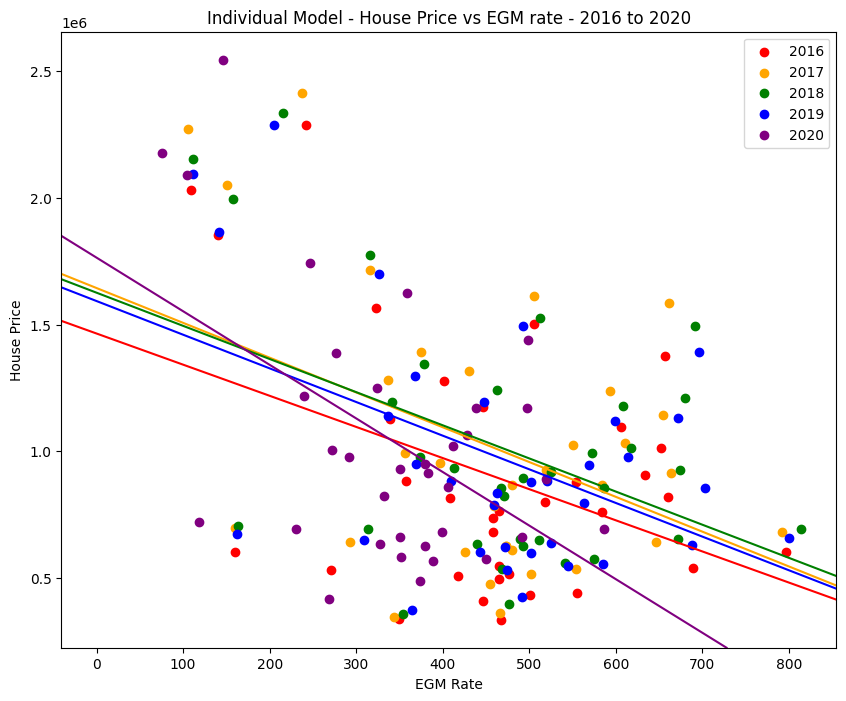

   Year    Intercept  Coefficient               MSE        RMSE  Pearson Correlation
0  2016 1465002.4399   -1229.5951 196431232283.8186 443205.6321               0.3990
1  2017 1644587.9942   -1374.5316 222602450388.8782 471807.6413               0.4096
2  2018 1626196.5955   -1309.0945 188656948831.8516 434346.5769               0.4338
3  2019 1593236.3632   -1329.1603 167101671715.9863 408780.7135               0.4650
4  2020 1764659.1271   -2116.5355 186627789176.3371 432004.3856               0.5015


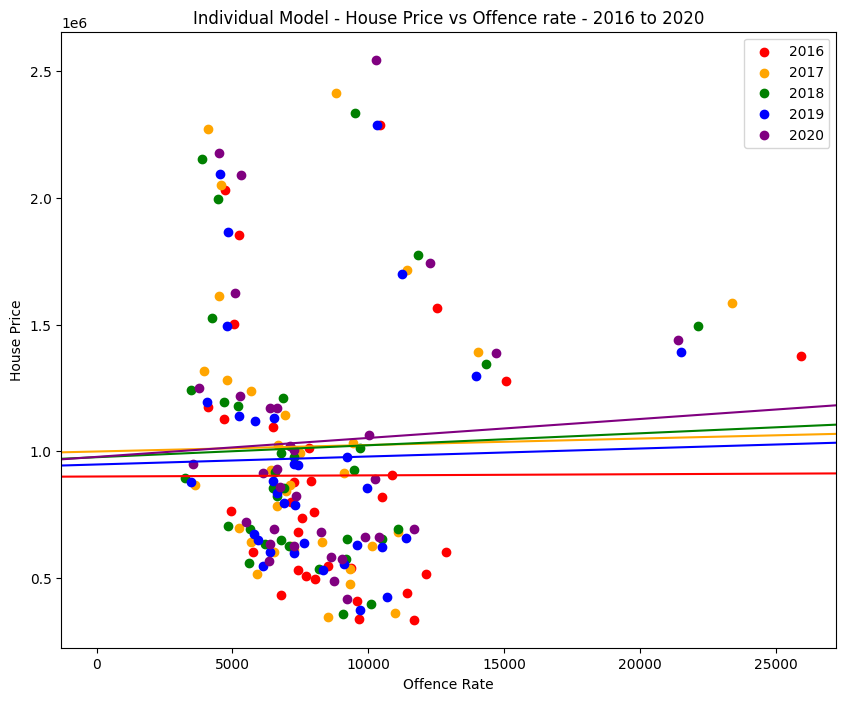

   Year   Intercept  Coefficient               MSE        RMSE  Pearson Correlation
0  2016 900374.7505       0.4475 240459272303.2227 490366.4674               0.0037
1  2017 999089.0215       2.5567 275372907046.8569 524759.8566               0.0177
2  2018 976502.0641       4.7228 238952051573.1421 488827.2206               0.0347
3  2019 947774.8981       3.1560 219322421825.2444 468318.7182               0.0227
4  2020 977778.4352       7.4824 256120488015.4424 506083.4793               0.0503


In [4]:
#### HOUSE PRICE VS EGM - ANY YEAR and HOUSE PRICE VS OFFENCES - STACKED YEARS ####

def house_price_vs_egm_stacked(year_start=2016, year_end=2020): 
    house_price_readcsv_df = pd.read_csv('Houses by LGA.csv')
    egm_rate_readcsv_df = pd.read_csv('EGM-New-Format.csv')

    house_price_df_list = []
    egm_rate_df_list = []
    merged_HP_EGM_df_list = []
    for year in range(year_start, year_end+1):
        # year = 2019
        house_price_df = house_price_readcsv_df[house_price_readcsv_df['Year'] == year].copy()
        egm_rate_df = egm_rate_readcsv_df[egm_rate_readcsv_df['Year'] == year].copy()

        house_price_df['LGA'] = house_price_df['LGA'].str.lower()
        # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (c)")
        # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (s)")
        house_price_df = house_price_df.rename({'Weighted House Price': 'House Price'}, axis=1)
        egm_rate_df['LGA'] = egm_rate_df['LGA'].str.lower()
        # egm_rate_df = egm_rate_df.rename({'LGA Name': 'LGA'}, axis=1)
        egm_rate_df = egm_rate_df.rename({'rate': 'EGM Rate'}, axis=1)

        # merge the two datasets
        # merged_HP_EGM_df = pd.merge(house_price_2019_df, egm_rate_2019_df, on='LGA')
        merged_HP_EGM_df = pd.merge(house_price_df, egm_rate_df, on='LGA')
        # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_x', axis=1)
        # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_y', axis=1)
        # merged_HP_EGM_df

        house_price_df_list.append(house_price_df)
        egm_rate_df_list.append(egm_rate_df)
        merged_HP_EGM_df_list.append(merged_HP_EGM_df)

    # x_col = ['EGM rate 2019', 'Offences Rate 2019']
    x_col = 'EGM Rate'
    y_col = 'House Price'

    # Convert columns to numpy arrays and reshape x_train
    # x_train = merged_HP_EGM_df[x_col]
    # y_train = merged_HP_EGM_df[y_col]
    # x_train_mr = merged_HP_EGM_df[x_col].values.reshape(-1, 1)
    # y_train_mr = merged_HP_EGM_df[y_col].values

    x_train_mr_list = []
    y_train_mr_list = []
    for merged_HP_EGM_df in merged_HP_EGM_df_list:
        x_train_mr_list.append(merged_HP_EGM_df[x_col].values.reshape(-1, 1))
        y_train_mr_list.append(merged_HP_EGM_df[y_col].values)

    # create design matrix X and predictions y
    # # split into train and test 
    # x_train = merged_HP_EGM_df[x_col]
    # y_train = merged_HP_EGM_df[y_col]
    # x_test = test[x_col]
    # y_test = test[y_col]

    # Fit the model
    # lm_egm = LinearRegression().fit(x_train_mr, y_train_mr)
    colourmap = {0: 'red', 1: 'orange', 2: 'green', 3: 'blue', 4: 'purple'}
    lm_egm_list = []
    legend = []
    results_list = []
    plt.figure(figsize=(10, 8))
    for i in range(0, len(merged_HP_EGM_df_list)):
        lm_egm = LinearRegression().fit(x_train_mr_list[i], y_train_mr_list[i])
        lm_egm_list.append(lm_egm)
        y_pred_egm = lm_egm.predict(x_train_mr_list[i])
        # merged_HP_EGM_df['Predicted House Price 2019'] = y_pred_mr
        mse = mean_squared_error(y_train_mr_list[i], y_pred_egm)
        rmse = np.sqrt(mse)
        pearson_corr, p = pearsonr(y_train_mr_list[i], y_pred_egm)
        # print("Individual Model - House Price vs EGM - ", year_start+i)
        # print('Intercept', lm_egm.intercept_)
        # print('Coefficients', lm_egm.coef_)
        # print('Mean Squared Error', '%.4f' % mse)
        # print('Root Mean Squared Error', '%.4f' % rmse)
        # print('Pearson Correlation', '%.4f' % pearson_corr)
        results = {
        'Year': year_start + i,
        'Intercept': lm_egm.intercept_,
        'Coefficient': lm_egm.coef_[0],
        'MSE': mse,
        'RMSE': rmse,
        'Pearson Correlation': pearson_corr
        }
        results_list.append(results)

        # Plot the scatter plot and the line of regression
        # plt.scatter(x_train_mr, y_train_mr)
        plt.scatter(merged_HP_EGM_df_list[i][x_col], merged_HP_EGM_df_list[i][y_col], color=colourmap[i])
        # plt.plot(merged_HP_EGM_df[x_col], merged_HP_EGM_df['Predicted House Price 2019'], color='red')
        plt.axline((0, lm_egm.intercept_), slope=lm_egm.coef_[0], color=colourmap[i], label='_nolegend_')
        legend.append(str(year_start+i))
    
    plt.title("Individual Model - House Price vs EGM rate - " + str(year_start) + " to " + str(year_end))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(legend)
    plt.show()

    results_df = pd.DataFrame(results_list)
    pd.options.display.float_format = '{:.4f}'.format
    pd.set_option('display.width', 1000)  
    print(results_df)


def house_price_vs_offence_stacked(year_start=2016, year_end=2020): 
    house_price_readcsv_df = pd.read_csv('Houses by LGA.csv')
    offences_rate_readcsv_df = pd.read_csv('Offences By LGA NEW.csv')

    house_price_df_list = []
    offences_rate_df_list = []
    merged_HP_offence_df_list = []
    for year in range(year_start, year_end+1):
        # year = 2019
        house_price_df = house_price_readcsv_df[house_price_readcsv_df['Year'] == year].copy()
        offences_rate_df = offences_rate_readcsv_df[offences_rate_readcsv_df['Year'] == year].copy()

        house_price_df['LGA'] = house_price_df['LGA'].str.lower()
        # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (c)")
        # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (s)")
        house_price_df = house_price_df.rename({'Weighted House Price': 'House Price'}, axis=1)
        offences_rate_df['LGA'] = offences_rate_df['LGA'].str.lower()
        # offences_rate_df = offences_rate_df.rename({'2019 Offence Rate': 'Offences Rate 2019'}, axis=1)

        # merge the two datasets
        merged_HP_offence_df = pd.merge(house_price_df, offences_rate_df, on='LGA')
        # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_x', axis=1)
        # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_y', axis=1)
        # merged_HP_EGM_df

        house_price_df_list.append(house_price_df)
        offences_rate_df_list.append(offences_rate_df)
        merged_HP_offence_df_list.append(merged_HP_offence_df)

    # x_col = ['EGM rate 2019', 'Offences Rate 2019']
    x_col = 'Offence Rate'
    y_col = 'House Price'

    # Convert columns to numpy arrays and reshape x_train
    # x_train = merged_HP_EGM_df[x_col]
    # y_train = merged_HP_EGM_df[y_col]
    # x_train_mr = merged_HP_EGM_df[x_col].values.reshape(-1, 1)
    # y_train_mr = merged_HP_EGM_df[y_col].values

    x_train_mr_list = []
    y_train_mr_list = []
    for merged_HP_offence_df in merged_HP_offence_df_list:
        x_train_mr_list.append(merged_HP_offence_df[x_col].values.reshape(-1, 1))
        y_train_mr_list.append(merged_HP_offence_df[y_col].values)

    # create design matrix X and predictions y
    # # split into train and test 
    # x_train = merged_HP_EGM_df[x_col]
    # y_train = merged_HP_EGM_df[y_col]
    # x_test = test[x_col]
    # y_test = test[y_col]

    # Fit the model
    # lm_egm = LinearRegression().fit(x_train_mr, y_train_mr)
    colourmap = {0: 'red', 1: 'orange', 2: 'green', 3: 'blue', 4: 'purple'}
    legend = []
    lm_offence_list = []
    results_list = []
    plt.figure(figsize=(10, 8))
    for i in range(0, len(merged_HP_offence_df_list)):
        lm_offence = LinearRegression().fit(x_train_mr_list[i], y_train_mr_list[i])
        lm_offence_list.append(lm_offence)
        y_pred_offence = lm_offence.predict(x_train_mr_list[i])
        # merged_HP_EGM_df['Predicted House Price 2019'] = y_pred_mr

        mse = mean_squared_error(y_train_mr_list[i], y_pred_offence)
        rmse = np.sqrt(mse)
        pearson_corr, p = pearsonr(y_train_mr_list[i], y_pred_offence)
        # print("Individual Model - House Price vs EGM - ", year_start+i)
        # print('Intercept', lm_offence.intercept_)
        # print('Coefficients', lm_offence.coef_)
        # print('Mean Squared Error', '%.4f' % mse)
        # print('Root Mean Squared Error', '%.4f' % rmse)
        # print('Pearson Correlation', '%.4f' % pearson_corr)
        results = {
        'Year': year_start + i,
        'Intercept': lm_offence.intercept_,
        'Coefficient': lm_offence.coef_[0],
        'MSE': mse,
        'RMSE': rmse,
        'Pearson Correlation': pearson_corr
        }
        results_list.append(results)

        # Plot the scatter plot and the line of regression
        # plt.scatter(x_train_mr, y_train_mr)
        plt.scatter(merged_HP_offence_df_list[i][x_col], merged_HP_offence_df_list[i][y_col], color=colourmap[i])
        # plt.plot(merged_HP_EGM_df[x_col], merged_HP_EGM_df['Predicted House Price 2019'], color='red')
        plt.axline((0, lm_offence.intercept_), slope=lm_offence.coef_[0], color=colourmap[i], label='_nolegend_')
        legend.append(str(year_start+i))
    
    plt.title("Individual Model - House Price vs Offence rate - " + str(year_start) + " to " + str(year_end))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(legend)
    plt.show()

    results_df = pd.DataFrame(results_list)
    pd.options.display.float_format = '{:.4f}'.format
    pd.set_option('display.width', 1000)  
    print(results_df)

house_price_vs_egm_stacked()
house_price_vs_offence_stacked()

Combined Model -  2016


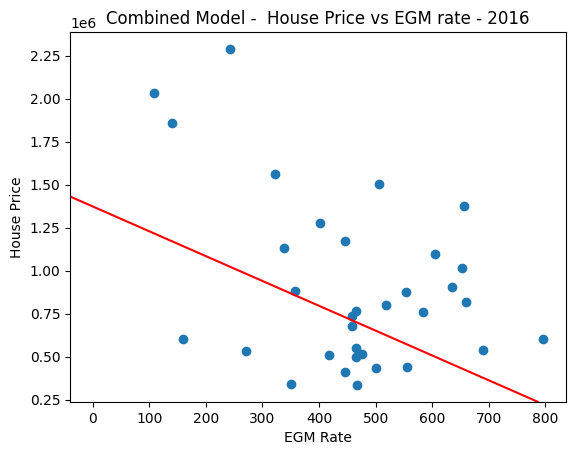

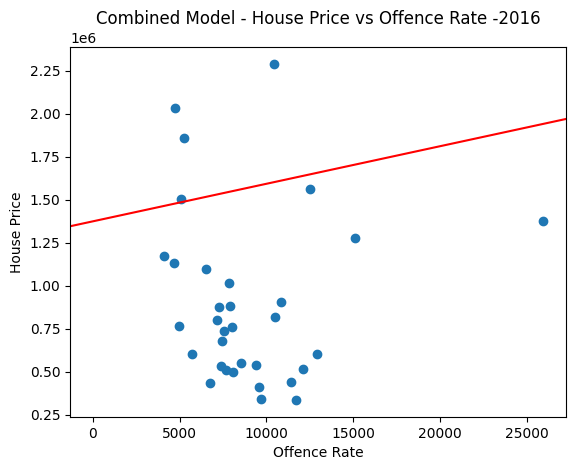

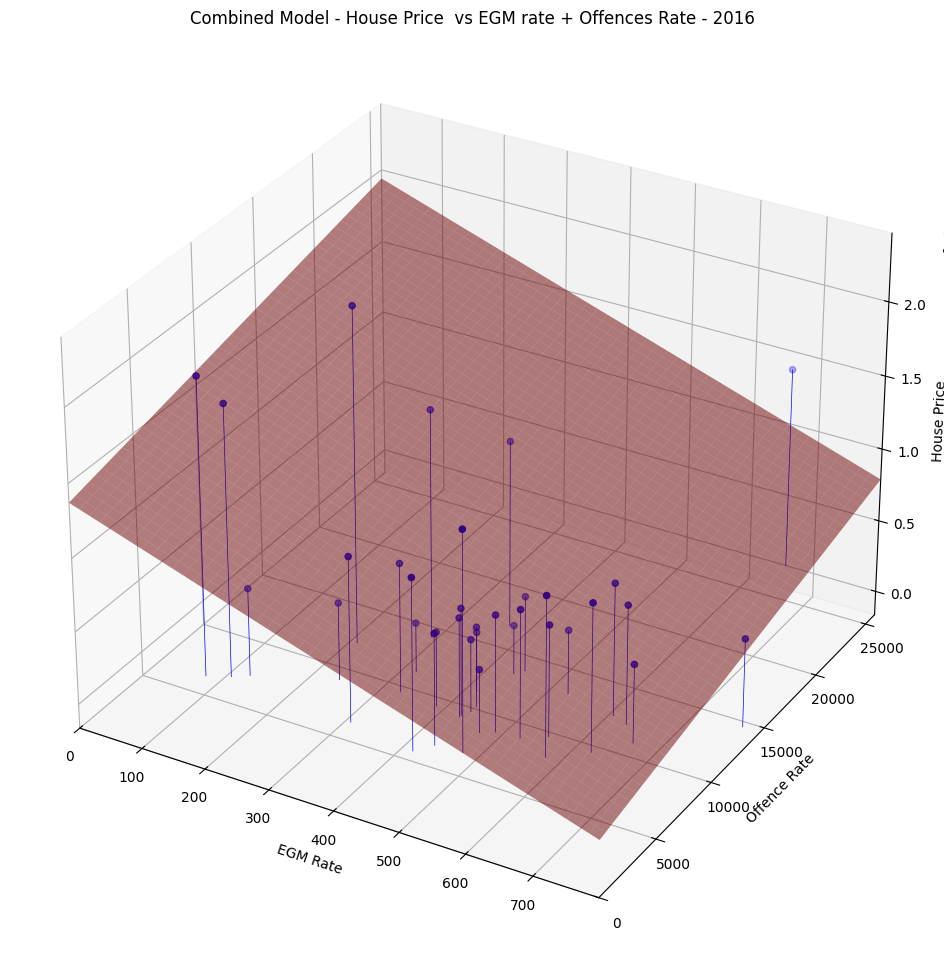

Combined Model -  2017


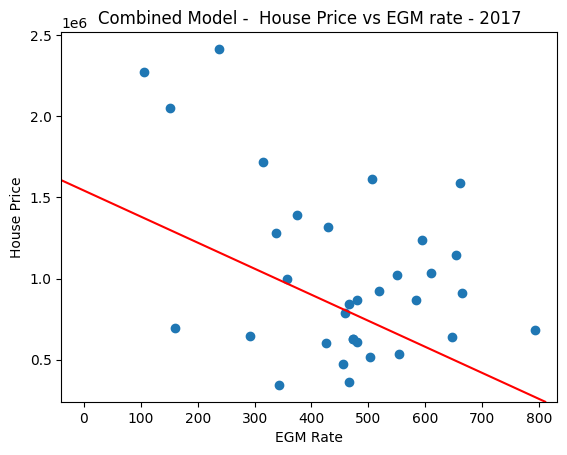

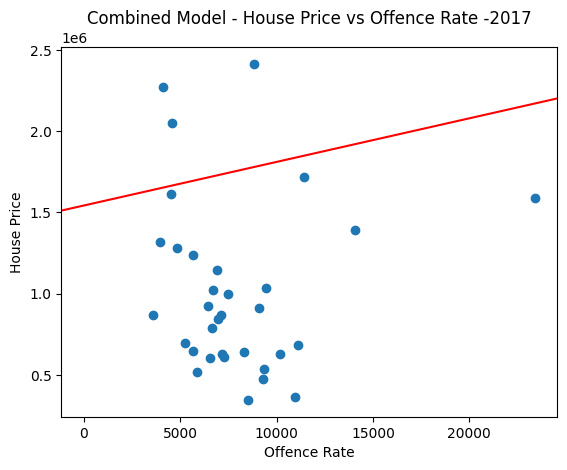

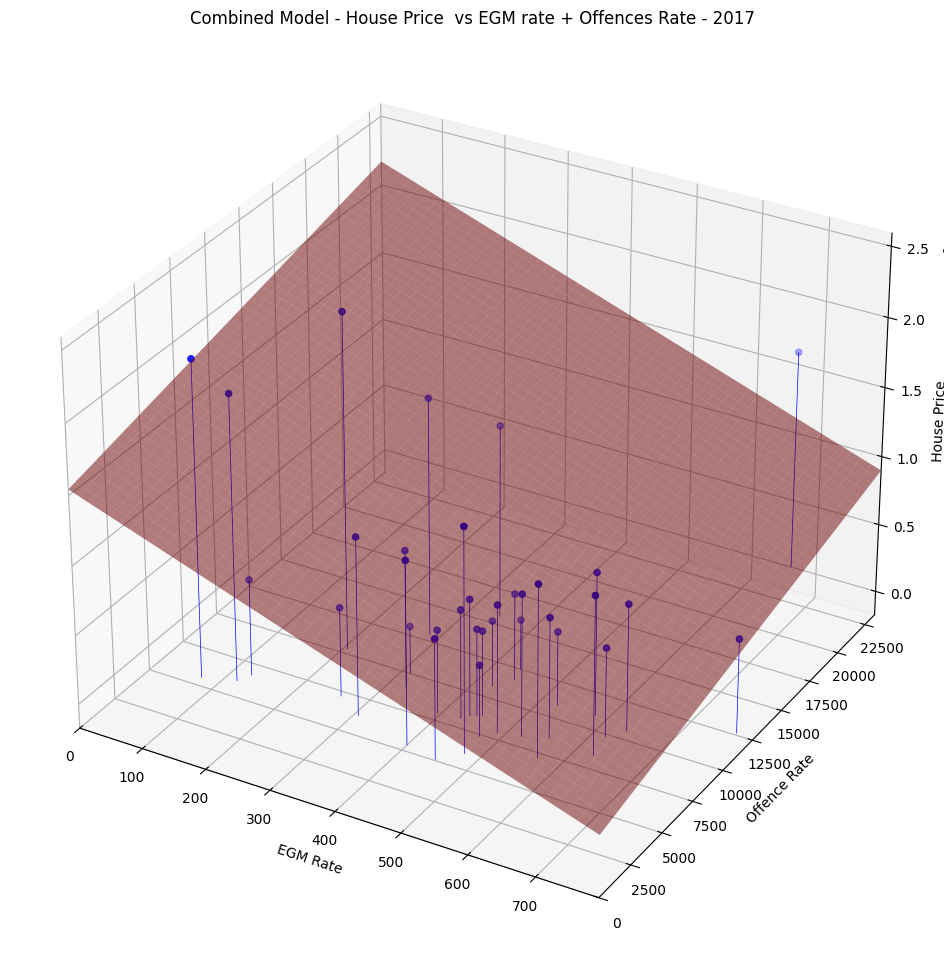

Combined Model -  2018


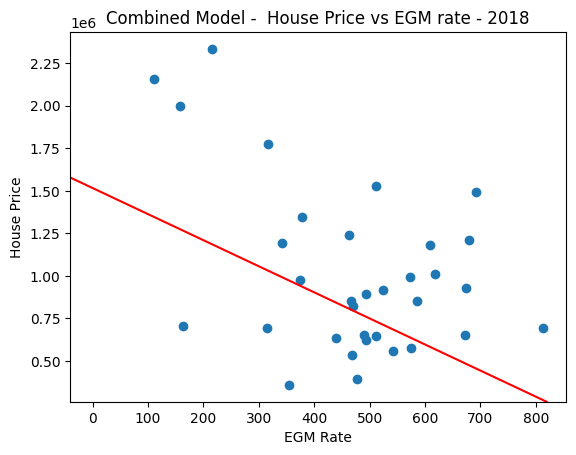

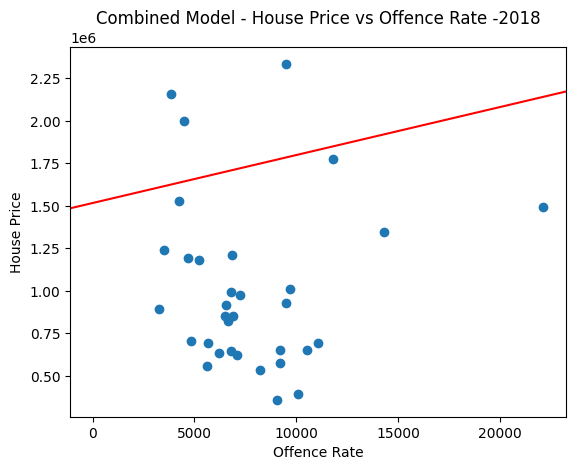

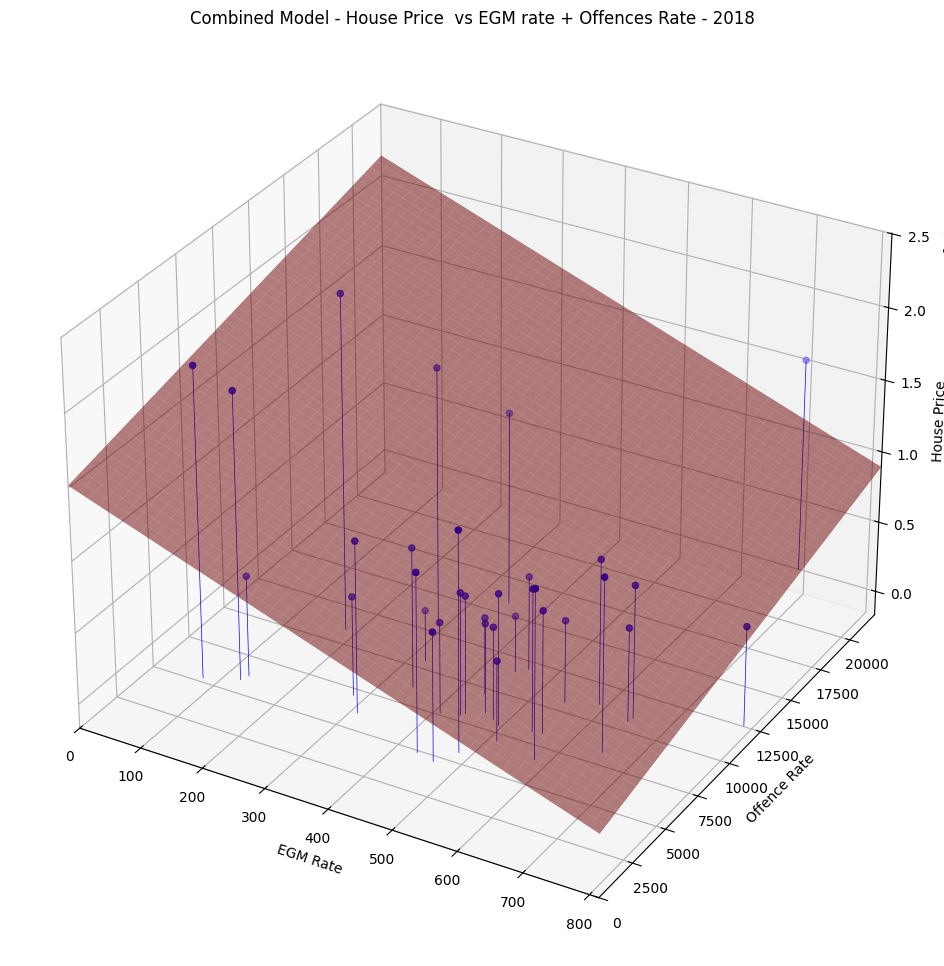

Combined Model -  2019


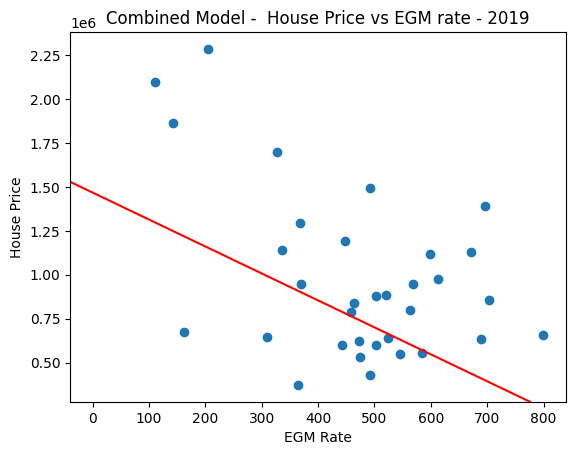

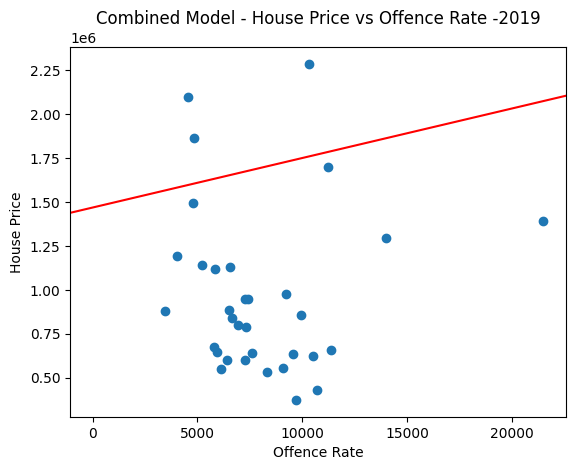

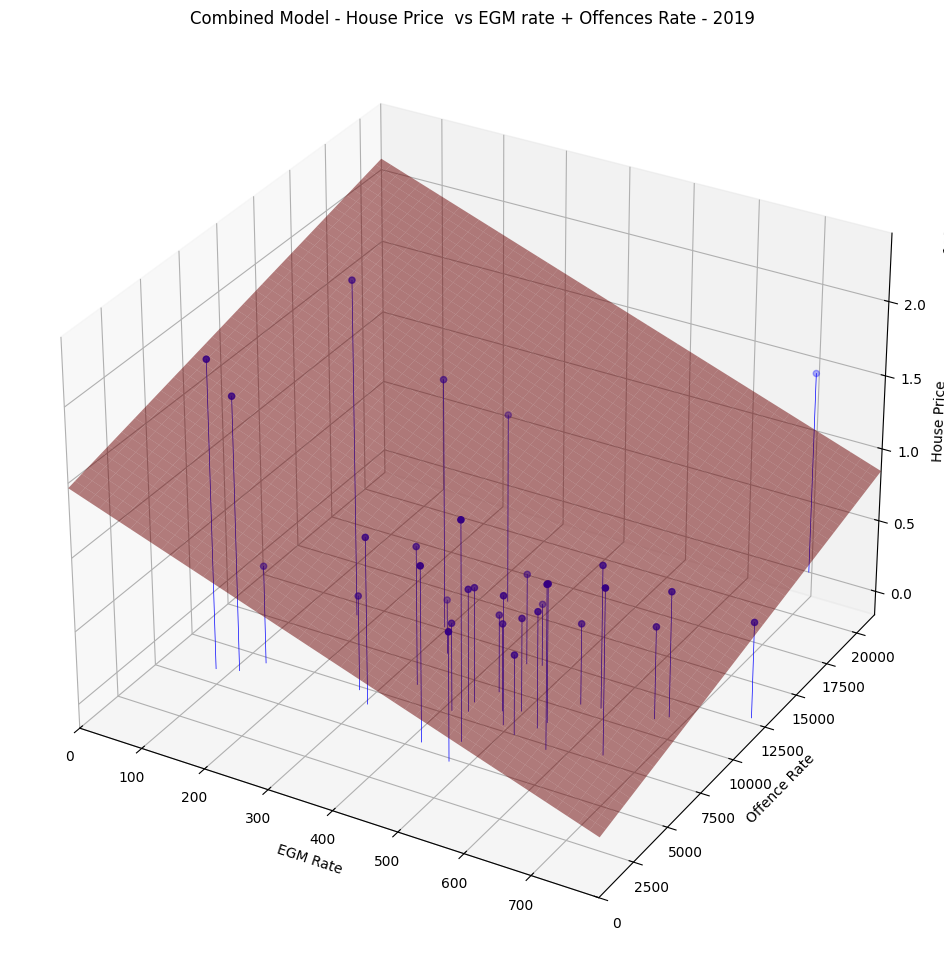

Combined Model -  2020


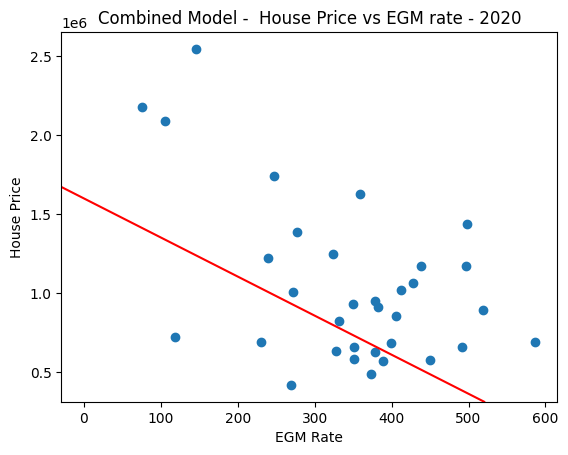

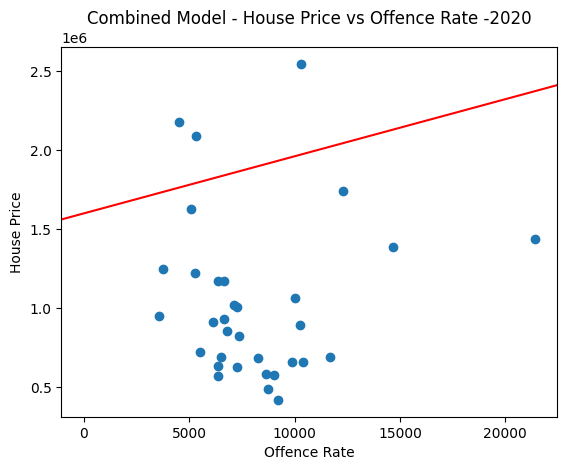

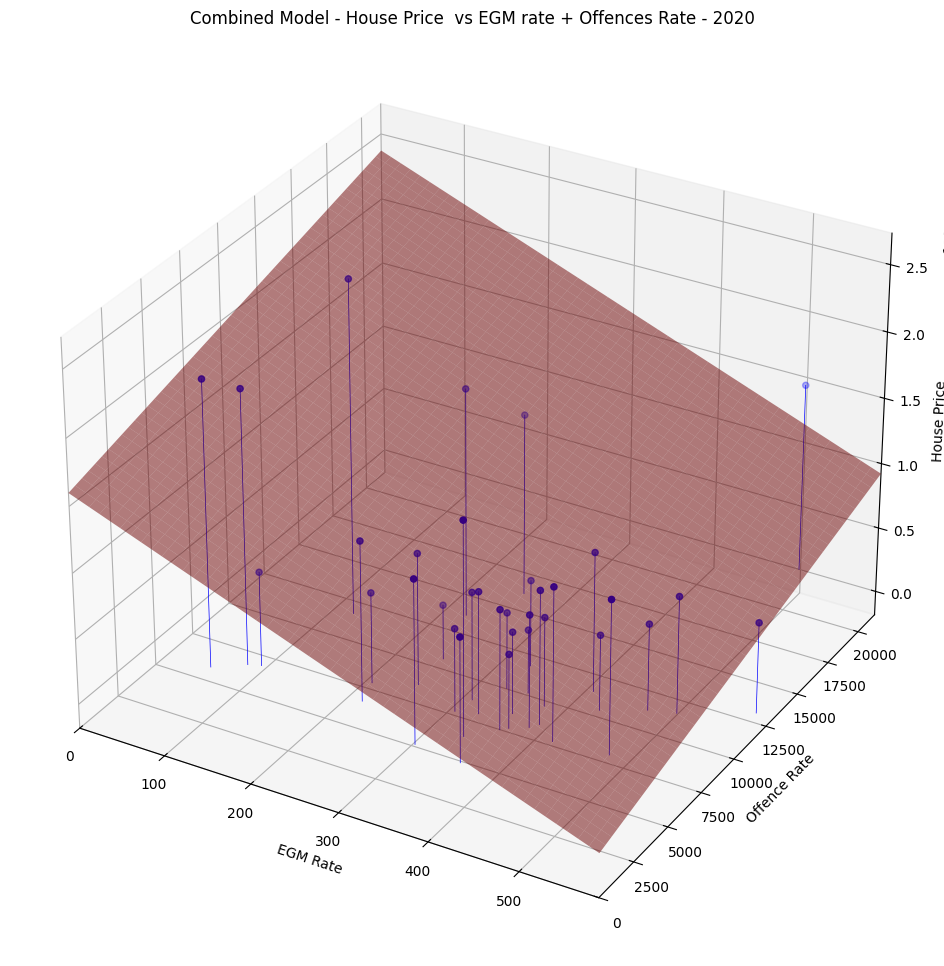

Combined Model -  2016


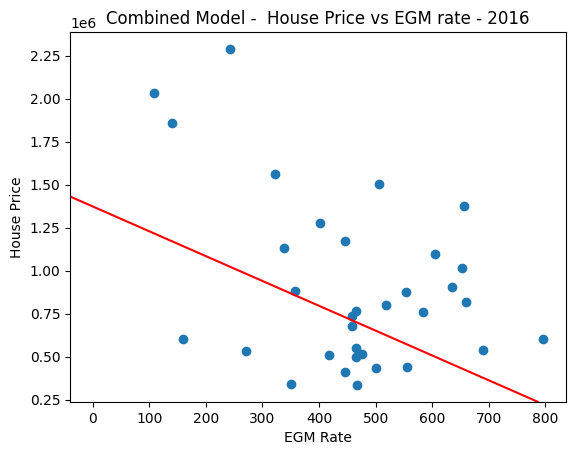

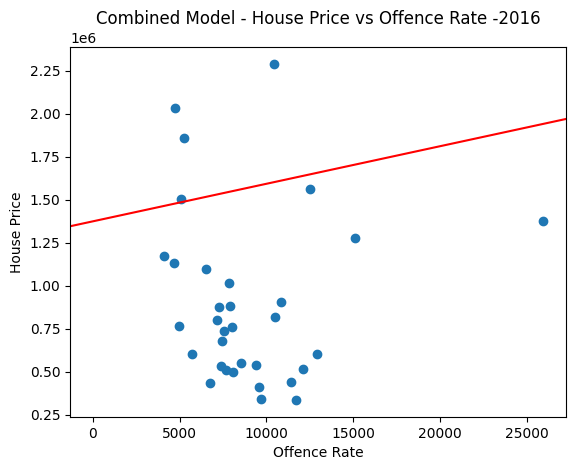

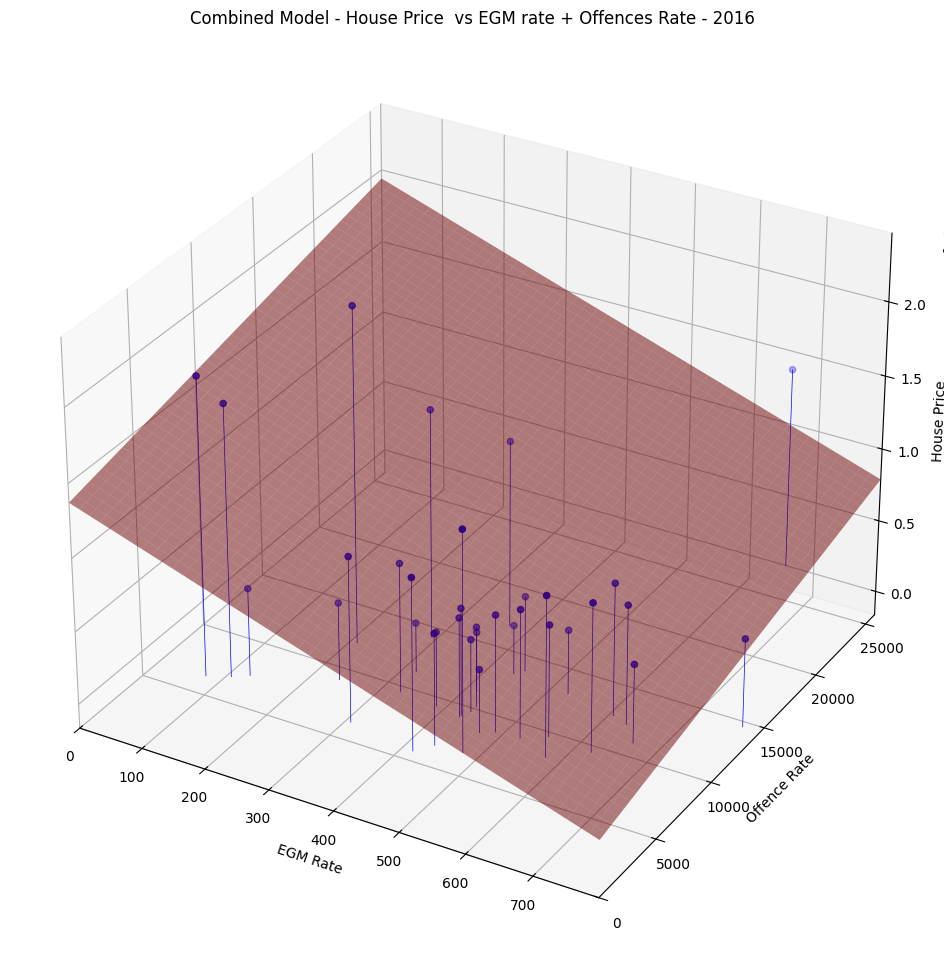

Combined Model -  2017


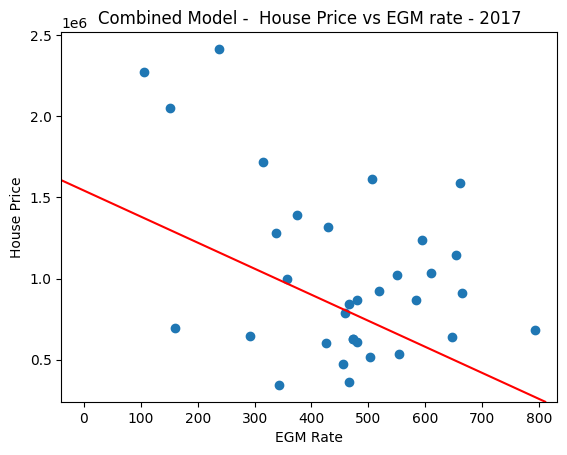

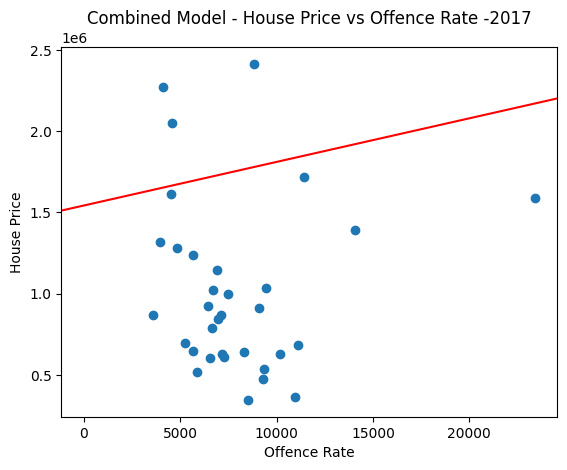

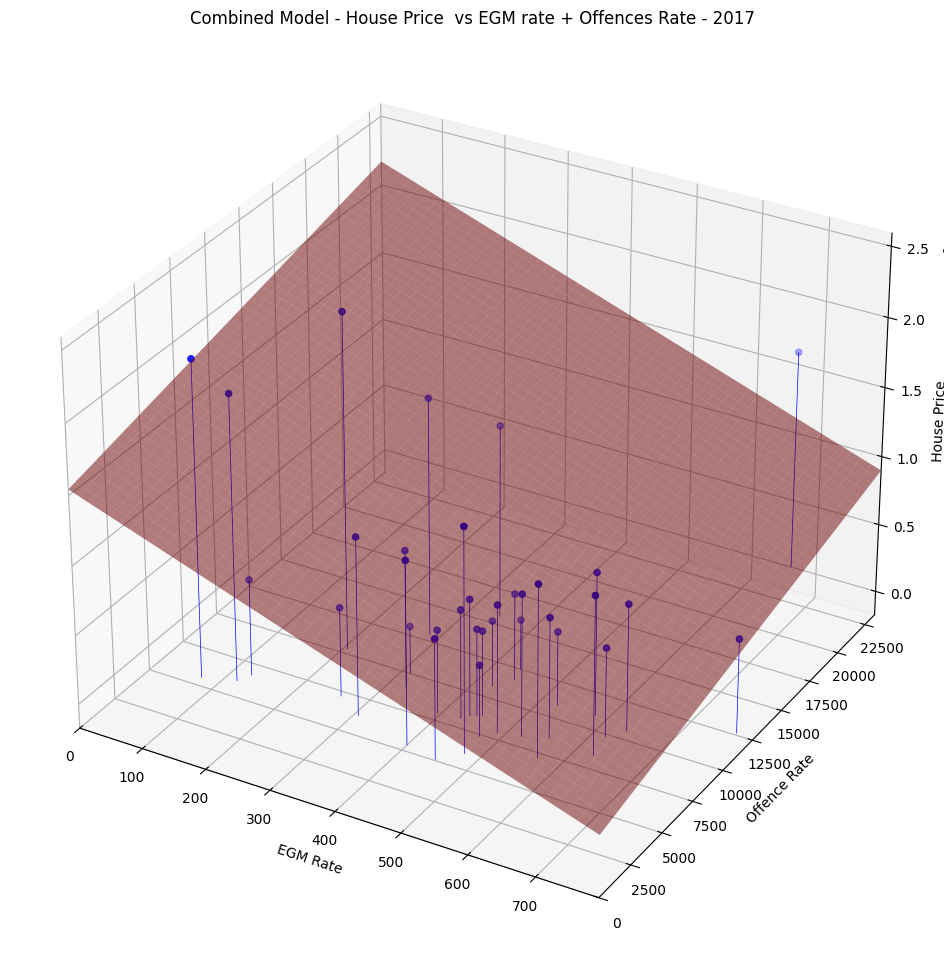

Combined Model -  2018


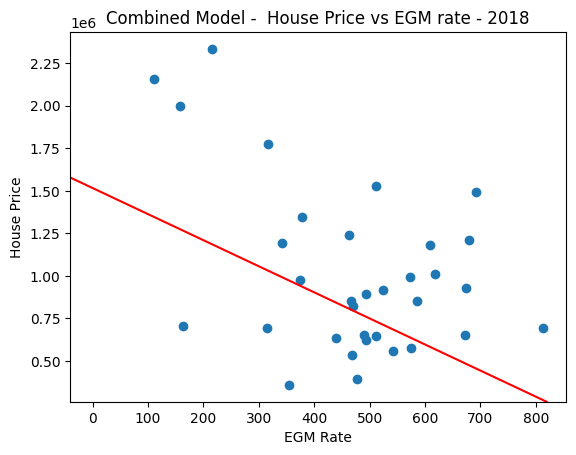

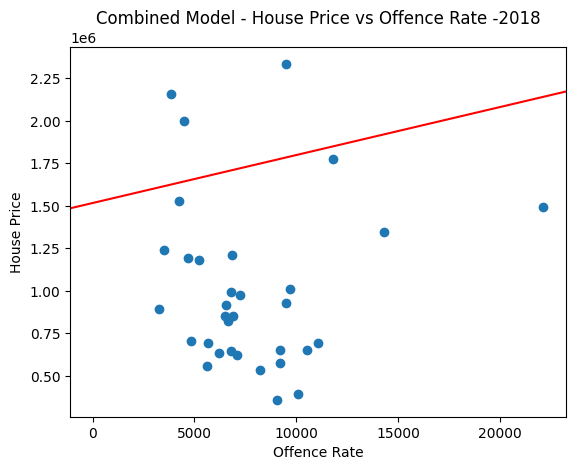

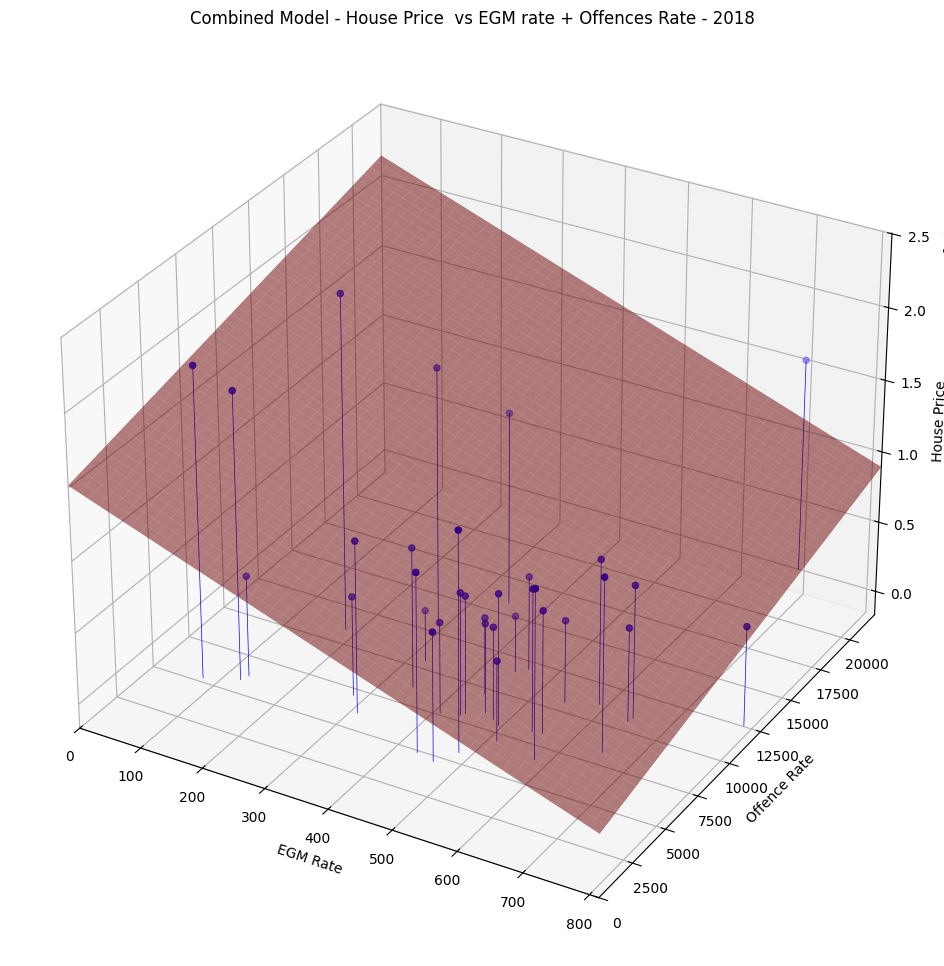

Combined Model -  2019


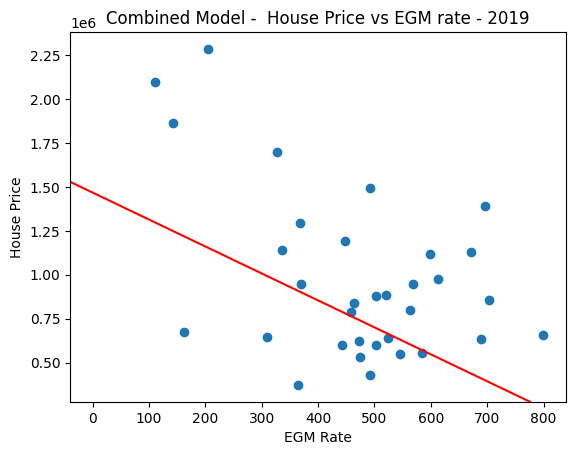

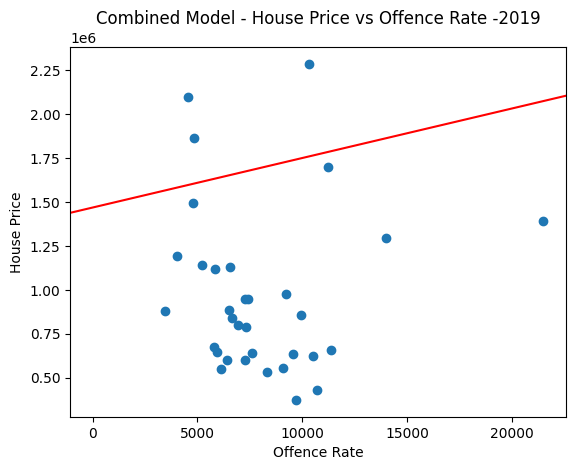

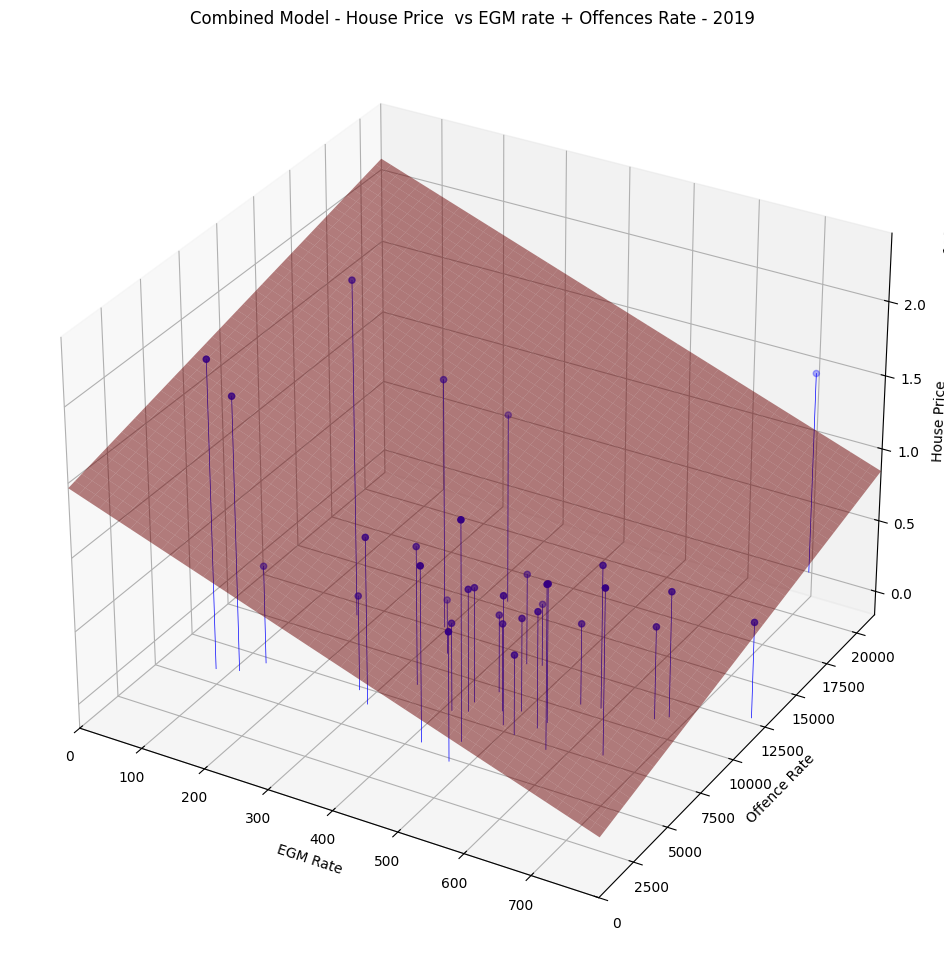

Combined Model -  2020


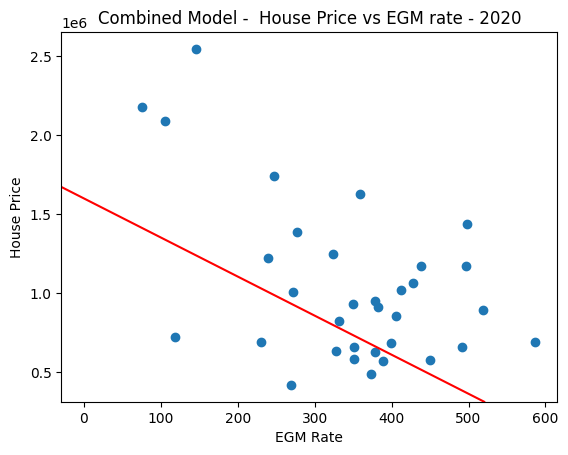

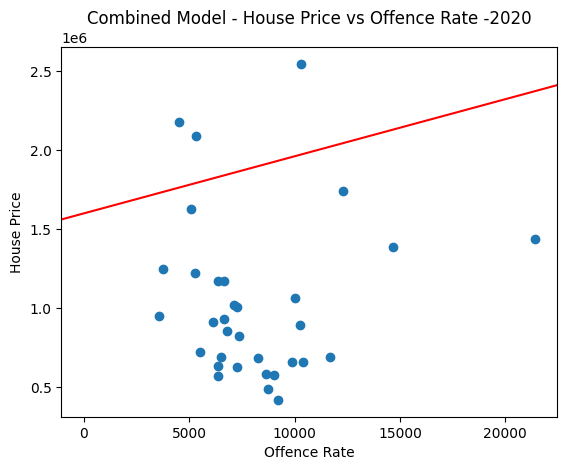

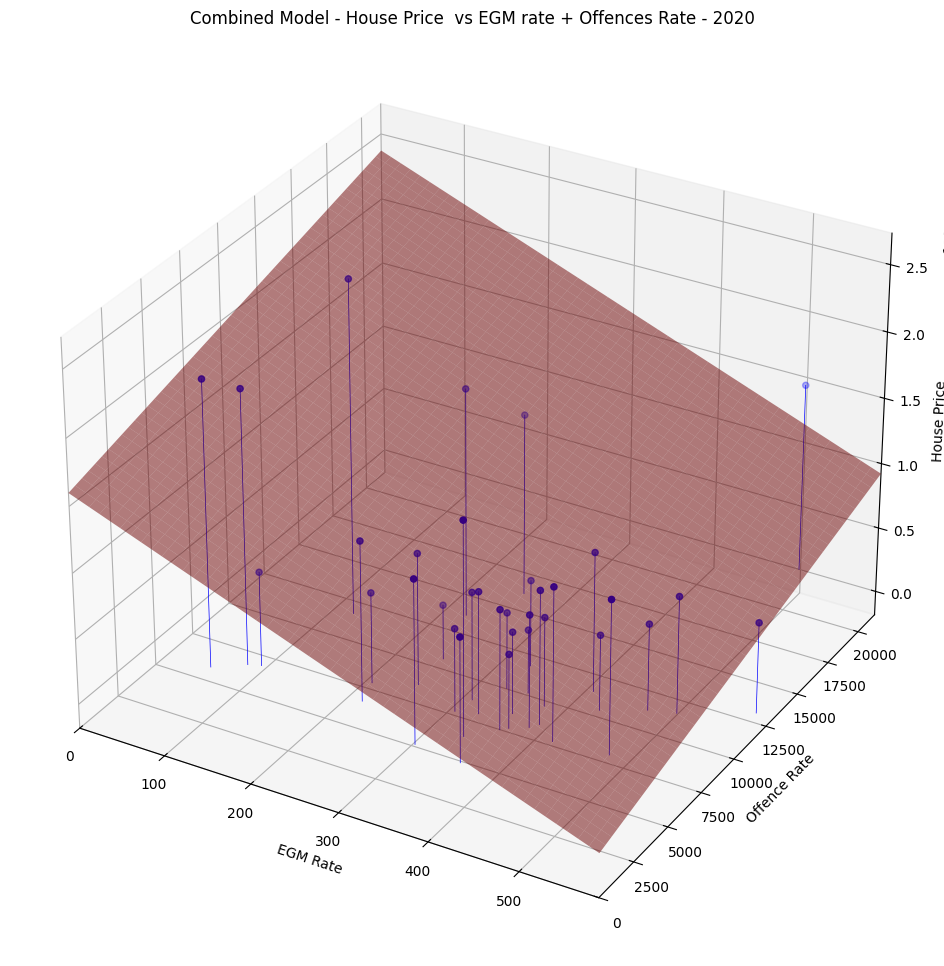

Combined Model - House Price vs EGM + Offences
   Year    Intercept  Coefficient 1  Coefficient 2               MSE        RMSE  Pearson Correlation
0  2016 1373109.4644     -1445.1124        21.8800 195076341950.4948 441674.4751               0.4344
1  2017 1542513.8023     -1606.4953        26.8747 220314312829.3874 469376.5150               0.4474
2  2018 1516451.0188     -1533.0064        28.2049 184540852126.2004 429582.1832               0.4782
3  2019 1468316.4594     -1536.4651        28.2069 163259006924.0818 404053.2229               0.5060
4  2020 1599430.1128     -2475.3336        36.1605 177836509439.0403 421706.6628               0.5544


In [5]:
#### COMBINED MODEL - HOUSE PRICE VS EGM + OFFENCES - ANY YEAR ####

def combined_model(year=2019):
    house_price_df = pd.read_csv('Houses by LGA.csv')
    egm_rate_df = pd.read_csv('EGM-New-Format.csv')
    offences_rate_df = pd.read_csv('Offences By LGA NEW.csv')

    # year = 2019
    house_price_df = house_price_df[house_price_df['Year'] == year]
    egm_rate_df = egm_rate_df[egm_rate_df['Year'] == year]
    offences_rate_df = offences_rate_df[offences_rate_df['Year'] == year]

    house_price_df['LGA'] = house_price_df['LGA'].str.lower()
    # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (c)")
    # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (s)")
    house_price_df = house_price_df.rename({'Weighted House Price': 'House Price'}, axis=1)
    egm_rate_df['LGA'] = egm_rate_df['LGA'].str.lower()
    # egm_rate_df = egm_rate_df.rename({'LGA Name': 'LGA'}, axis=1)
    egm_rate_df = egm_rate_df.rename({'rate': 'EGM Rate'}, axis=1)
    # egm_rate_df
    offences_rate_df['LGA'] = offences_rate_df['LGA'].str.lower()
    # offences_rate_df = offences_rate_df.rename({'2019 Offence Rate': 'Offences Rate 2019'}, axis=1)

    # merge the 3 datasets
    merged_HP_EGM_df = pd.merge(house_price_df, egm_rate_df, on='LGA')
    merged_HP_EGM_df = pd.merge(merged_HP_EGM_df, offences_rate_df, on='LGA')
    # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_x', axis=1)
    # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_y', axis=1)
    # merged_HP_EGM_df
    # test = pd.read_csv('supervised_test.csv')

    x_col = ['EGM Rate', 'Offence Rate']
    y_col = 'House Price'

    # Convert columns to numpy arrays and reshape x_train
    x_train = merged_HP_EGM_df[x_col]
    y_train = merged_HP_EGM_df[y_col]
    # x_train_mr = merged_HP_EGM_df[x_col].values.reshape(-1, 1)
    # x_train_mr0 = merged_HP_EGM_df[x_col[0]].values.reshape(-1, 1)
    # x_train_mr1 = merged_HP_EGM_df[x_col[1]].values.reshape(-1, 1)
    # y_train_mr = merged_HP_EGM_df[y_col].values

    # Fit the combined model
    lm_combined = LinearRegression().fit(x_train, y_train)
    y_pred_mr = lm_combined.predict(x_train)
    # merged_HP_EGM_df['Predicted House Price 2019'] = y_pred_mr
    mse = mean_squared_error(y_train, y_pred_mr)
    rmse = np.sqrt(mse)
    pearson_corr, p = pearsonr(y_train, y_pred_mr)
    print("Combined Model - ", year)
    # print('Intercept', lm_combined.intercept_)
    # print('Coefficients', lm_combined.coef_)
    # print('Mean Squared Error', '%.4f' % mse)
    # print('Root Mean Squared Error', '%.4f' % rmse)
    # print('Pearson Correlation', '%.4f' % pearson_corr)
    results = {
    'Year': year,
    'Intercept': lm_combined.intercept_,
    'Coefficient 1': lm_combined.coef_[0],
    'Coefficient 2': lm_combined.coef_[1],
    'MSE': mse,
    'RMSE': rmse,
    'Pearson Correlation': pearson_corr
    }

    # x_train_mr

    # Plot the scatter plot and the line of regression
    # plt.scatter(x_train_mr, y_train_mr)
    plt.scatter(merged_HP_EGM_df[x_col[0]], merged_HP_EGM_df[y_col])
    # plt.plot(merged_HP_EGM_df[x_col[0]], merged_HP_EGM_df['Predicted House Price 2019'], color='red')
    plt.axline((0, lm_combined.intercept_), slope=lm_combined.coef_[0], color='red')
    plt.title('Combined Model -  House Price vs EGM rate - ' + str(year))
    plt.xlabel(x_col[0])
    plt.ylabel(y_col)
    plt.show()

    # Plot the scatter plot and the line of regression
    # plt.scatter(x_train_mr, y_train_mr)
    plt.scatter(merged_HP_EGM_df[x_col[1]], merged_HP_EGM_df[y_col])
    # plt.plot(merged_HP_EGM_df[x_col[1]], merged_HP_EGM_df['Predicted House Price 2019'], color='red')
    plt.axline((0, lm_combined.intercept_), slope=lm_combined.coef_[1], color='red')
    plt.title('Combined Model - House Price vs Offence Rate -' + str(year))
    plt.xlabel(x_col[1])
    plt.ylabel(y_col)
    plt.show()

    def my_3d_plot_1(rotate=None): 
        fig = plt.figure(figsize=(12, 12))
        ax = plt.axes(projection="3d")

        # Plot the scatter points
        ax.scatter(merged_HP_EGM_df[x_col[0]], merged_HP_EGM_df[x_col[1]], merged_HP_EGM_df[y_col], color='blue')
        ax.set_xlim([0, merged_HP_EGM_df[x_col[0]].max()])
        ax.set_ylim([0, merged_HP_EGM_df[x_col[1]].max()])
        
        # Plot lines from (x, y, 0) to (x, y, z) for each scatter point
        for i in range(len(merged_HP_EGM_df)):
            ax.plot([merged_HP_EGM_df[x_col[0]].iloc[i], merged_HP_EGM_df[x_col[0]].iloc[i]],   # x values
                    [merged_HP_EGM_df[x_col[1]].iloc[i], merged_HP_EGM_df[x_col[1]].iloc[i]],   # y values
                    [0, merged_HP_EGM_df[y_col].iloc[i]],   # z values (from 0 to z)
                    color='blue', linewidth=0.5)

        # Create meshgrid for X and Y values based on data range
        x_1 = np.linspace(0, merged_HP_EGM_df[x_col[0]].max(),1000)
        x_2 = np.linspace(0, merged_HP_EGM_df[x_col[1]].max(),1000)
        x_1, x_2 = np.meshgrid(x_1, x_2)

        # Calculate corresponding Z values using the plane equation
        y = lm_combined.intercept_ + lm_combined.coef_[0] * x_1 + lm_combined.coef_[1] * x_2

        # Plot the regression plane
        ax.plot_surface(x_1, x_2, y, color='red', alpha=0.5)

        ax.set_title('Combined Model - House Price  vs EGM rate + Offences Rate - ' + str(year))
        ax.set_xlabel(x_col[0])
        ax.set_ylabel(x_col[1])
        ax.set_zlabel(y_col)
        if rotate is not None:
            ax.view_init(azim=rotate)
        plt.show()

    my_3d_plot_1()
    # my_3d_plot_1(rotate=0)
    # my_3d_plot_1(rotate=270)

    return results



combined_model(2016)
combined_model(2017)
combined_model(2018)
combined_model(2019)
combined_model(2020)

results_list = []
for year in range(2016, 2021):  # 2016 to 2020
    results_list.append(combined_model(year))

results_df = pd.DataFrame(results_list)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.width', 1000)
print("Combined Model - House Price vs EGM + Offences")
print(results_df)

Combined Model -  2020
Combined Model -  2020
Combined Model -  2020
Combined Model -  2020
Combined Model -  2020


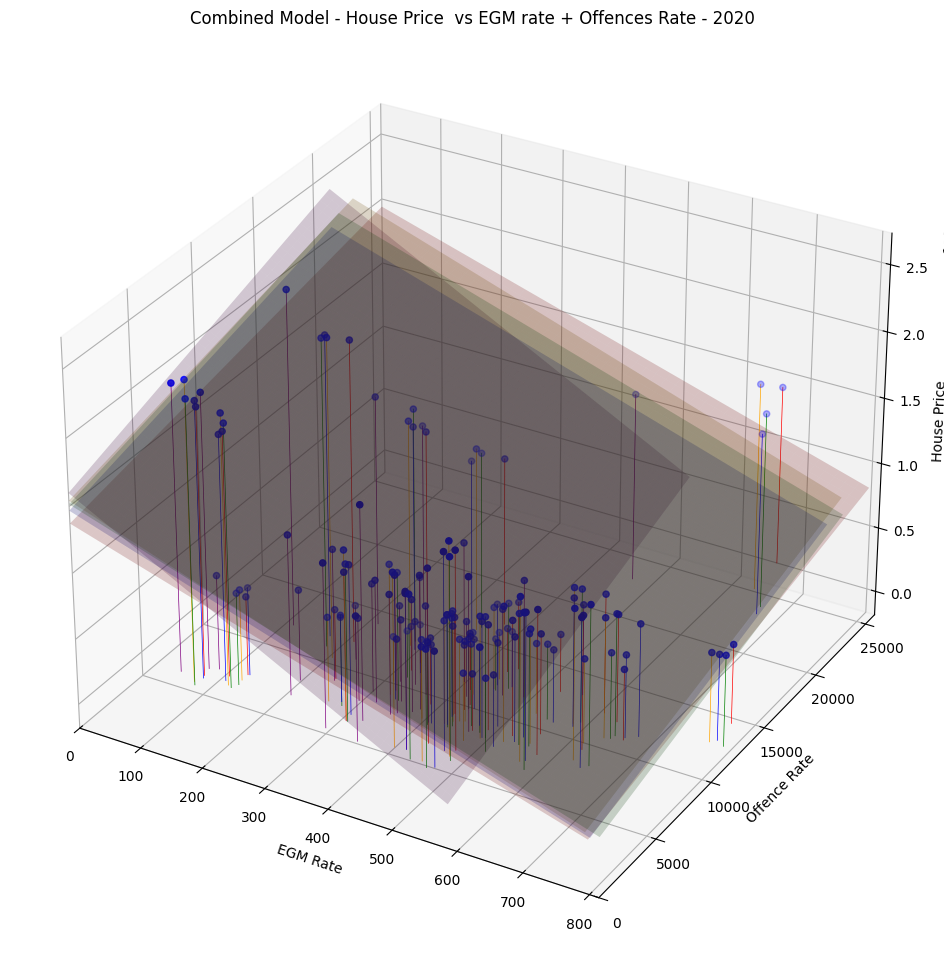

{'Year': 2020,
 'Intercept': np.float64(1599430.1127648996),
 'Coefficient 1': np.float64(-2475.3336193429514),
 'Coefficient 2': np.float64(36.16053119703373),
 'MSE': np.float64(177836509439.04028),
 'RMSE': np.float64(421706.6627871088),
 'Pearson Correlation': np.float64(0.5544451594059311)}

In [6]:
#### COMBINED MODEL - HOUSE PRICE VS EGM + OFFENCES - STACKED YEAR ####

def combined_model_stacked(year_start=2016, year_end=2020):
    house_price_readcsv_df = pd.read_csv('Houses by LGA.csv')
    egm_rate_readcsv_df = pd.read_csv('EGM-New-Format.csv')
    offences_rate_readcsv_df = pd.read_csv('Offences By LGA NEW.csv')

    house_price_df_list = []
    egm_rate_df_list = []
    offences_rate_df_list = []
    merged_HP_egm_offence_df_list = []
    for year in range(year_start, year_end+1):
        # year = 2019
        house_price_df = house_price_readcsv_df[house_price_readcsv_df['Year'] == year].copy()
        egm_rate_df = egm_rate_readcsv_df[egm_rate_readcsv_df['Year'] == year].copy()
        offences_rate_df = offences_rate_readcsv_df[offences_rate_readcsv_df['Year'] == year].copy()

        house_price_df['LGA'] = house_price_df['LGA'].str.lower()
        # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (c)")
        # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (s)")
        house_price_df = house_price_df.rename({'Weighted House Price': 'House Price'}, axis=1)
        egm_rate_df['LGA'] = egm_rate_df['LGA'].str.lower()
        # egm_rate_df = egm_rate_df.rename({'LGA Name': 'LGA'}, axis=1)
        egm_rate_df = egm_rate_df.rename({'rate': 'EGM Rate'}, axis=1)
        offences_rate_df['LGA'] = offences_rate_df['LGA'].str.lower()
        # offences_rate_df = offences_rate_df.rename({'2019 Offence Rate': 'Offences Rate 2019'}, axis=1)

        # merge the two datasets
        # merged_HP_EGM_df = pd.merge(house_price_2019_df, egm_rate_2019_df, on='LGA')
        merged_HP_EGM_offence_df = pd.merge(house_price_df, egm_rate_df, on='LGA')
        merged_HP_EGM_offence_df = pd.merge(merged_HP_EGM_offence_df, offences_rate_df, on='LGA')
        # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_x', axis=1)
        # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_y', axis=1)
        # merged_HP_EGM_df

        house_price_df_list.append(house_price_df)
        egm_rate_df_list.append(egm_rate_df)
        offences_rate_df_list.append(offences_rate_df)
        merged_HP_egm_offence_df_list.append(merged_HP_EGM_offence_df)

    # # year = 2019
    # house_price_df = house_price_df[house_price_df['Year'] == year]
    # egm_rate_df = egm_rate_df[egm_rate_df['Year'] == year]
    # offences_rate_df = offences_rate_df[offences_rate_df['Year'] == year]

    # house_price_df['LGA'] = house_price_df['LGA'].str.lower()
    # # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (c)")
    # # house_price_df['LGA'] = house_price_df['LGA'].str.rstrip(" (s)")
    # house_price_df = house_price_df.rename({'Weighted House Price': 'House Price'}, axis=1)
    # egm_rate_df['LGA'] = egm_rate_df['LGA'].str.lower()
    # # egm_rate_df = egm_rate_df.rename({'LGA Name': 'LGA'}, axis=1)
    # egm_rate_df = egm_rate_df.rename({'rate': 'EGM Rate'}, axis=1)
    # # egm_rate_df
    # offences_rate_df['LGA'] = offences_rate_df['LGA'].str.lower()
    # # offences_rate_df = offences_rate_df.rename({'2019 Offence Rate': 'Offences Rate 2019'}, axis=1)

    # # merge the 3 datasets
    # merged_HP_EGM_df = pd.merge(house_price_df, egm_rate_df, on='LGA')
    # merged_HP_EGM_df = pd.merge(merged_HP_EGM_df, offences_rate_df, on='LGA')
    # # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_x', axis=1)
    # # merged_HP_EGM_df = merged_HP_EGM_df.drop('0_y', axis=1)
    # # merged_HP_EGM_df
    # # test = pd.read_csv('supervised_test.csv')

    x_col = ['EGM Rate', 'Offence Rate']
    y_col = 'House Price'

    # # Convert columns to numpy arrays and reshape x_train
    # x_train = merged_HP_EGM_df[x_col]
    # y_train = merged_HP_EGM_df[y_col]
    # # x_train_mr = merged_HP_EGM_df[x_col].values.reshape(-1, 1)
    # # x_train_mr0 = merged_HP_EGM_df[x_col[0]].values.reshape(-1, 1)
    # # x_train_mr1 = merged_HP_EGM_df[x_col[1]].values.reshape(-1, 1)
    # # y_train_mr = merged_HP_EGM_df[y_col].values

    x_train_list = []
    y_train_list = []
    for merged_HP_EGM_offence_df in merged_HP_egm_offence_df_list:
        x_train_list.append(merged_HP_EGM_offence_df[x_col])
        y_train_list.append(merged_HP_EGM_offence_df[y_col])
        # x_train_mr_list.append(merged_HP_EGM_offence_df[x_col].values.reshape(-1, 1))
        # y_train_mr_list.append(merged_HP_EGM_offence_df[y_col].values)

    # Fit the combined model
    colourmap = {0: 'red', 1: 'orange', 2: 'green', 3: 'blue', 4: 'purple'}
    lm_merged_list = []
    legend = []
    results_list = []
    # plt.figure(figsize=(10, 8))
    plt.figure(figsize=(12, 12))
    ax = plt.axes(projection="3d")
    x_col_0_max = 0
    x_col_1_max = 0
    for i in range(0, len(merged_HP_egm_offence_df_list)):
        if merged_HP_egm_offence_df_list[i][x_col[0]].max() > x_col_0_max:
            x_col_0_max = merged_HP_egm_offence_df_list[i][x_col[0]].max()
        if merged_HP_egm_offence_df_list[i][x_col[1]].max() > x_col_1_max:
            x_col_1_max = merged_HP_egm_offence_df_list[i][x_col[1]].max()
    ax.set_xlim([0, x_col_0_max])
    ax.set_ylim([0, x_col_1_max])
    for i in range(0, len(merged_HP_egm_offence_df_list)):
        lm_combined = LinearRegression().fit(x_train_list[i], y_train_list[i])
        y_pred_mr = lm_combined.predict(x_train_list[i])
        # merged_HP_EGM_df['Predicted House Price 2019'] = y_pred_mr
        mse = mean_squared_error(y_train_list[i], y_pred_mr)
        rmse = np.sqrt(mse)
        pearson_corr, p = pearsonr(y_train_list[i], y_pred_mr)
        print("Combined Model - ", year)
        # print('Intercept', lm_combined.intercept_)
        # print('Coefficients', lm_combined.coef_)
        # print('Mean Squared Error', '%.4f' % mse)
        # print('Root Mean Squared Error', '%.4f' % rmse)
        # print('Pearson Correlation', '%.4f' % pearson_corr)
        results = {
        'Year': year,
        'Intercept': lm_combined.intercept_,
        'Coefficient 1': lm_combined.coef_[0],
        'Coefficient 2': lm_combined.coef_[1],
        'MSE': mse,
        'RMSE': rmse,
        'Pearson Correlation': pearson_corr
        }

        # x_train_mr

        # # Plot the scatter plot and the line of regression
        # # plt.scatter(x_train_mr, y_train_mr)
        # plt.scatter(merged_HP_egm_offence_df_list[i][x_col[0]], merged_HP_egm_offence_df_list[i][y_col])
        # # plt.plot(merged_HP_EGM_df[x_col[0]], merged_HP_EGM_df['Predicted House Price 2019'], color='red')
        # plt.axline((0, lm_combined.intercept_), slope=lm_combined.coef_[0], color='red')
        # plt.title('Combined Model -  House Price vs EGM rate - ' + str(year))
        # plt.xlabel(x_col[0])
        # plt.ylabel(y_col)
        # plt.show()

        # # Plot the scatter plot and the line of regression
        # # plt.scatter(x_train_mr, y_train_mr)
        # plt.scatter(merged_HP_egm_offence_df_list[i][x_col[1]], merged_HP_egm_offence_df_list[i][y_col])
        # # plt.plot(merged_HP_EGM_df[x_col[1]], merged_HP_EGM_df['Predicted House Price 2019'], color='red')
        # plt.axline((0, lm_combined.intercept_), slope=lm_combined.coef_[1], color='red')
        # plt.title('Combined Model - House Price vs Offence Rate -' + str(year))
        # plt.xlabel(x_col[1])
        # plt.ylabel(y_col)
        # plt.show()

    # def my_3d_plot_1(rotate=None): 
        # plt.figure(figsize=(12, 12))
        # ax = plt.axes(projection="3d")

        # Plot the scatter points
        ax.scatter(merged_HP_egm_offence_df_list[i][x_col[0]], merged_HP_egm_offence_df_list[i][x_col[1]], merged_HP_egm_offence_df_list[i][y_col], color='blue')
        # ax.set_xlim([0, merged_HP_egm_offence_df_list[i][x_col[0]].max()])
        # ax.set_ylim([0, merged_HP_egm_offence_df_list[i][x_col[1]].max()])
        
        # Plot lines from (x, y, 0) to (x, y, z) for each scatter point
        for j in range(0, len(merged_HP_egm_offence_df_list[i])):
            ax.plot([merged_HP_egm_offence_df_list[i][x_col[0]].iloc[j], merged_HP_egm_offence_df_list[i][x_col[0]].iloc[j]],   # x values
                    [merged_HP_egm_offence_df_list[i][x_col[1]].iloc[j], merged_HP_egm_offence_df_list[i][x_col[1]].iloc[j]],   # y values
                    [0, merged_HP_egm_offence_df_list[i][y_col].iloc[j]],   # z values (from 0 to z)
                    color=colourmap[i], linewidth=0.5)

        # Create meshgrid for X and Y values based on data range
        x_1 = np.linspace(0, merged_HP_egm_offence_df_list[i][x_col[0]].max(),1000)
        x_2 = np.linspace(0, merged_HP_egm_offence_df_list[i][x_col[1]].max(),1000)
        x_1, x_2 = np.meshgrid(x_1, x_2)

        # Calculate corresponding Z values using the plane equation
        y = lm_combined.intercept_ + lm_combined.coef_[0] * x_1 + lm_combined.coef_[1] * x_2

        # Plot the regression plane
        ax.plot_surface(x_1, x_2, y, color=colourmap[i], alpha=0.2)

    ax.set_title('Combined Model - House Price  vs EGM rate + Offences Rate - ' + str(year))
    ax.set_xlabel(x_col[0])
    ax.set_ylabel(x_col[1])
    ax.set_zlabel(y_col)
    # if rotate is not None:
    #     ax.view_init(azim=rotate)
    plt.show()

    # my_3d_plot_1()
    # my_3d_plot_1(rotate=0)
    # my_3d_plot_1(rotate=270)

    return results

# combined_model(2016)
# combined_model(2017)
# combined_model(2018)
# combined_model(2019)
# combined_model(2020)
combined_model_stacked(2016, 2020)

# results_list = []
# for year in range(2016, 2021):  # 2016 to 2020
#     results_list.append(combined_model(year))

# results_df = pd.DataFrame(results_list)
# pd.options.display.float_format = '{:.4f}'.format
# pd.set_option('display.width', 1000)
# print("Combined Model - House Price vs EGM + Offences")
# print(results_df)